In [46]:
import os
import json
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
cwd = os.getcwd()

print(cwd)
# sns.set_context('poster')
# Parse training configuration
#parser = argparse.ArgumentParser()
#parser.add_argument('--folder', type=str, default='runs', help='folder name')
#config = parser.parse_args()

scores = {'env':[], 'replay_type':[], 'buffer_size':[], 'parameters':[], 'cumulative_reward':[], 'episode': [], 'duration': [], 'reward': []}

config_folder = 'runs'



for env in os.listdir(config_folder):
    for er in os.listdir(f'{config_folder}/{env}'):
        for buff in os.listdir(f'{config_folder}/{env}/{er}'):
            for params in os.listdir(f'{config_folder}/{env}/{er}/{buff}'):
                for run in os.listdir(f'{config_folder}/{env}/{er}/{buff}/{params}'):
                    try:
                        with open(f'{config_folder}/{env}/{er}/{buff}/{params}/{run}/history.json', 'r') as f:
                            d = json.load(f)
                        
                        rewards = np.array(d['rewards'])
                        durations = np.array(d['durations'])
                        
                        durations = pd.Series(durations).rolling(10).mean()
                        rewards = pd.Series(rewards).rolling(10).mean()
                        
                        n = len(rewards)
                        scores['episode'] += list(range(len(rewards)))
                        scores['env'] += [env] * n
                        scores['replay_type'] += [er] * n
                        scores['buffer_size'] += [buff] * n
                        scores['parameters'] += [params] * n
                        
                        scores['duration'] += list(durations)
                        scores['cumulative_reward'] += list(np.cumsum(rewards))
                        scores['reward'] += list(rewards)
                        
                        
                    except FileNotFoundError:
                        pass

                    
scores = pd.DataFrame(scores)

scores


/home/max/develop/master_develop/rl-lab/RL_reprod/code


,env,replay_type,buffer_size,parameters,cumulative_reward,episode,duration,reward
0,cartpole,uniform_replay,buffer_10000,first_run_S_10000,NaN,0,NaN,NaN
1,cartpole,uniform_replay,buffer_10000,first_run_S_10000,NaN,1,NaN,NaN
2,cartpole,uniform_replay,buffer_10000,first_run_S_10000,NaN,2,NaN,NaN
3,cartpole,uniform_replay,buffer_10000,first_run_S_10000,NaN,3,NaN,NaN
4,cartpole,uniform_replay,buffer_10000,first_run_S_10000,NaN,4,NaN,NaN
...,...,...,...,...,...,...,...,...
52395,cliff,uniform_hindsight_replay,buffer_1000,buff_sizes_H_1000,-20607.6,95,200.0,-219.8
52396,cliff,uniform_hindsight_replay,buffer_1000,buff_sizes_H_1000,-20827.4,96,200.0,-219.8
52397,cliff,uniform_hindsight_replay,buffer_1000,buff_sizes_H_1000,-21037.3,97,200.0,-209.9
52398,cliff,uniform_hindsight_replay,buffer_1000,buff_sizes_H_1000,-21247.2,98,200.0,-209.9


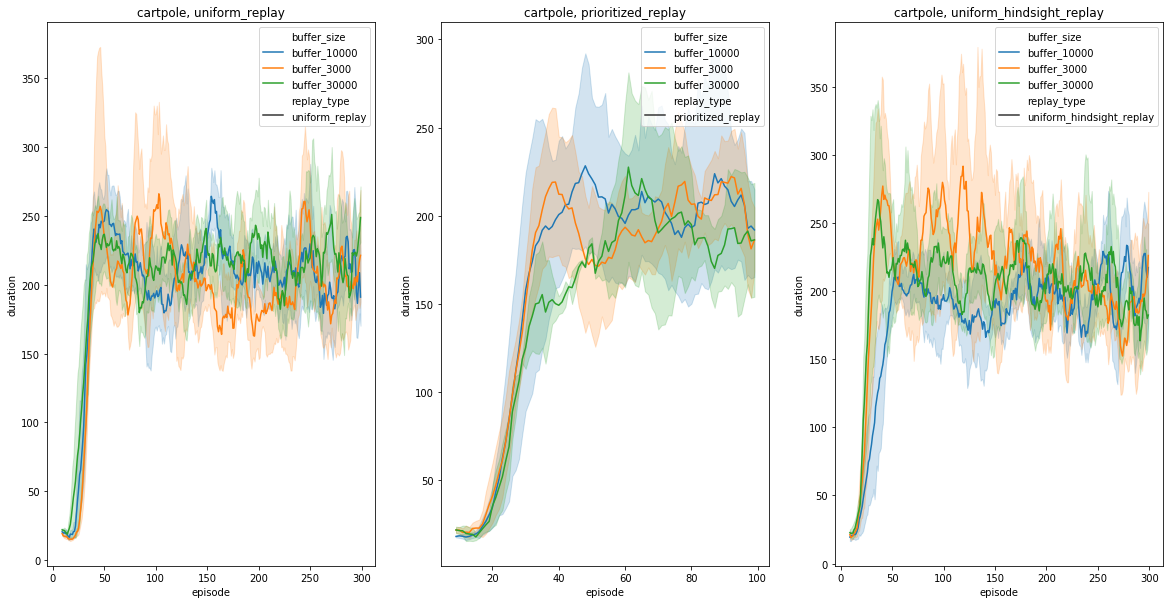

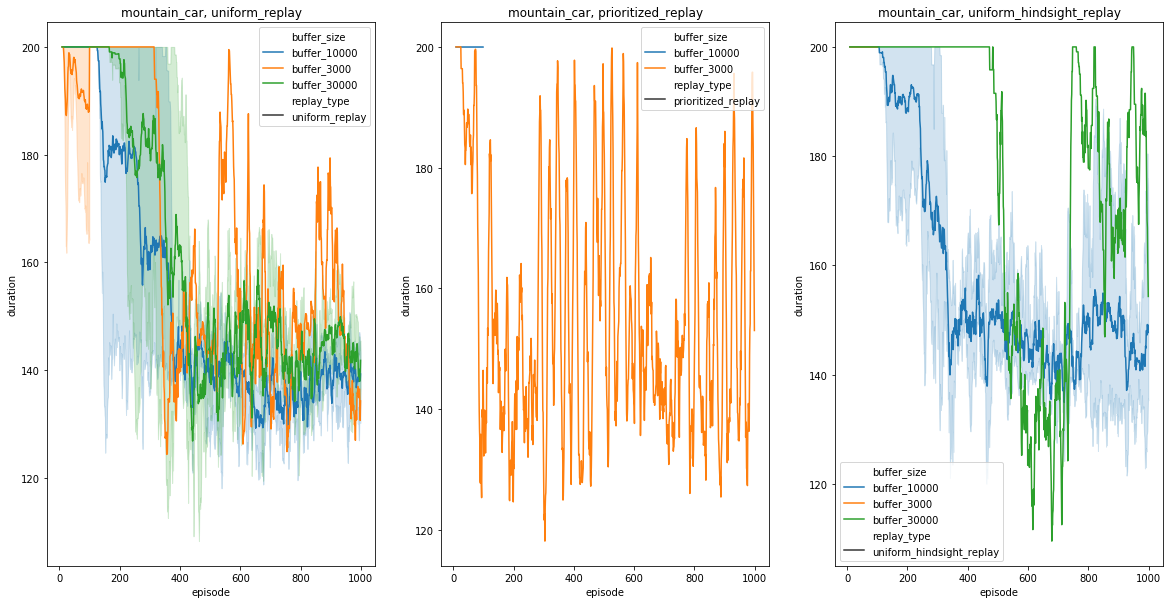

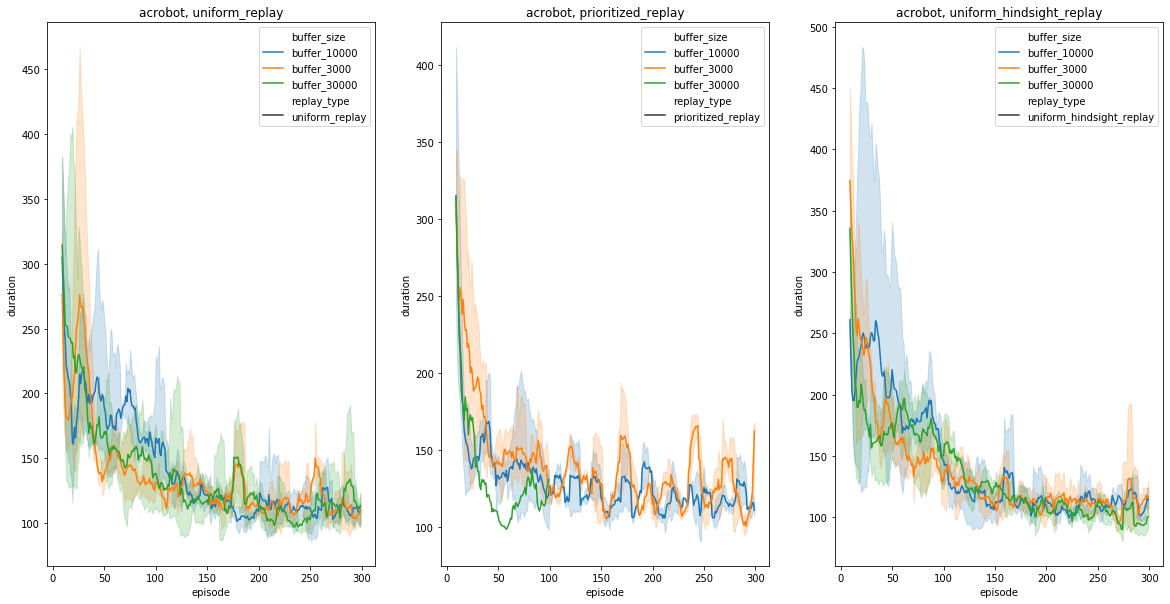

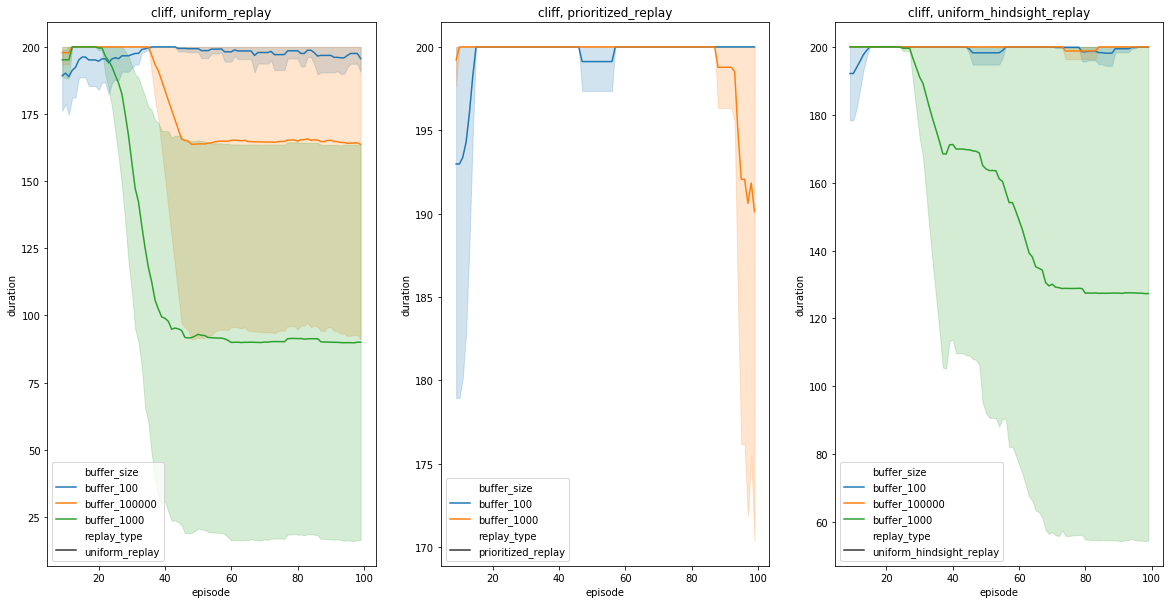

In [5]:
for env in scores['env'].unique():
    fig, ax = plt.subplots(1, 3, figsize=(20,10))
    
    for index, replay_type in enumerate(scores['replay_type'].unique()):
        
        part = scores[(scores['env'] == env) & (scores['replay_type'] == replay_type)]
        
        sns.lineplot(ax=ax[index], data=part, x='episode', y='duration', hue='buffer_size', style='replay_type')
        ax[index].set_title(f"{env}, {replay_type}")
    
    plt.show()

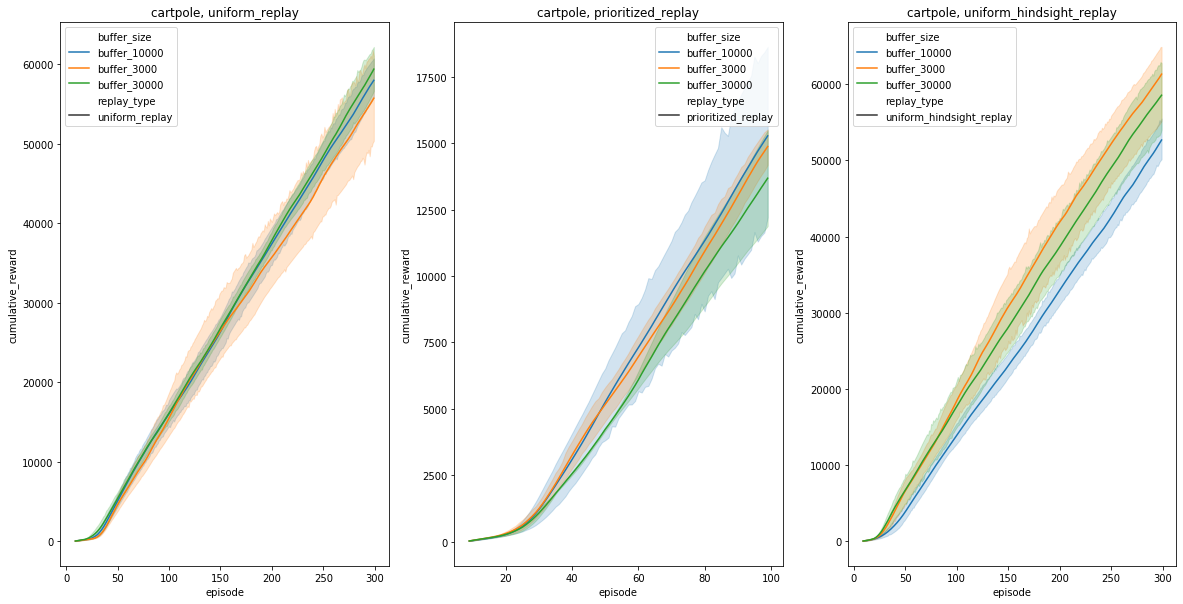

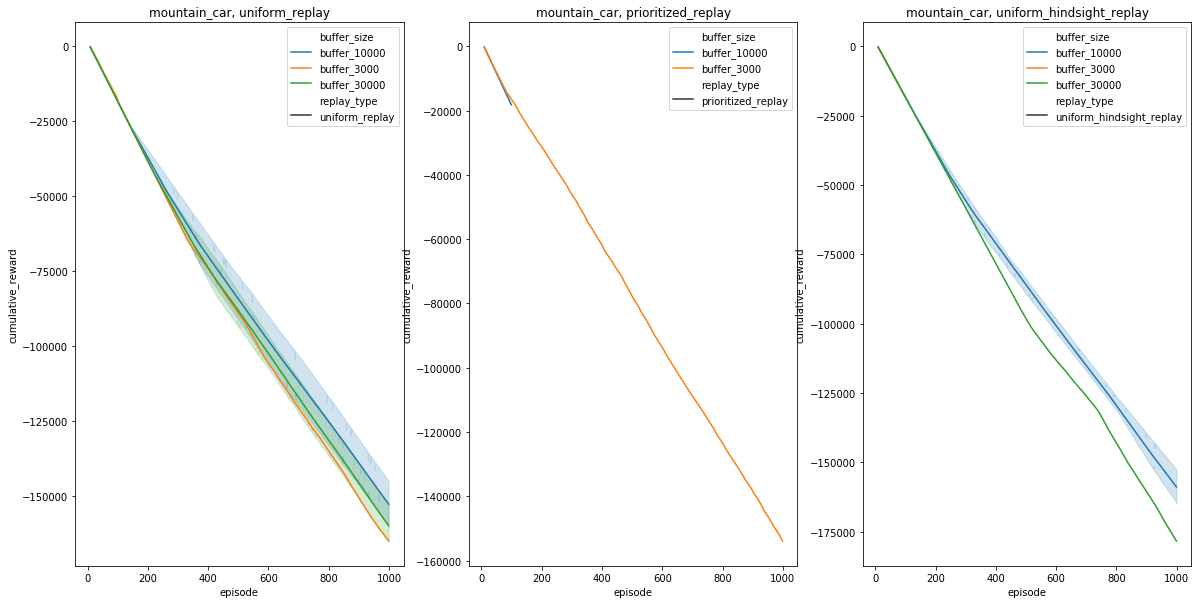

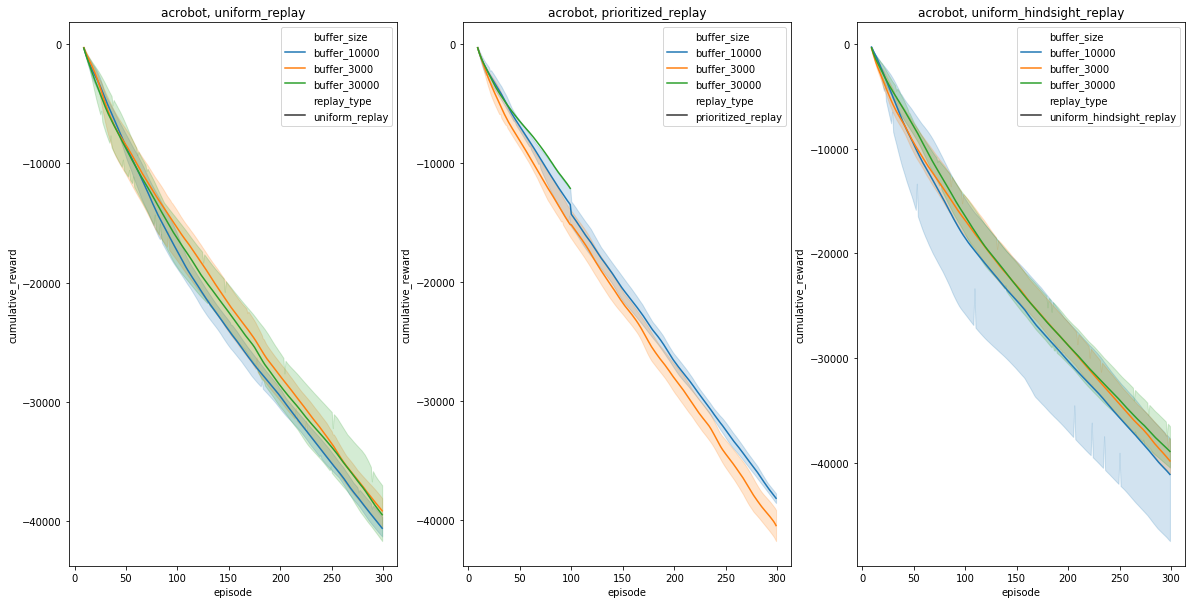

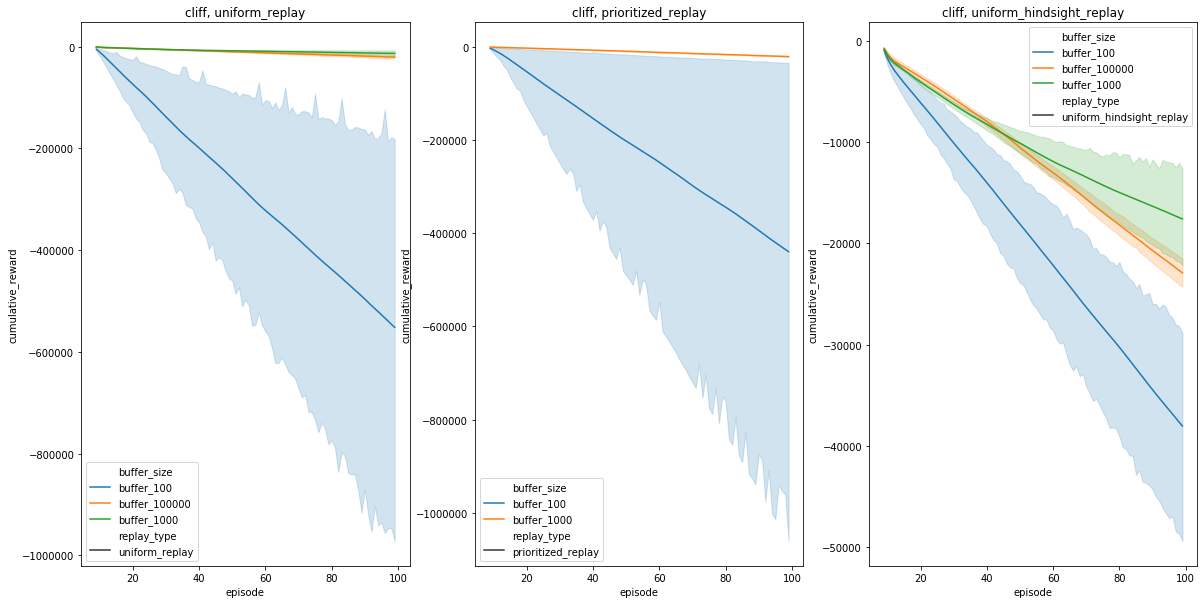

In [6]:
for env in scores['env'].unique():
    fig, ax = plt.subplots(1, 3, figsize=(20,10))
    
    for index, replay_type in enumerate(scores['replay_type'].unique()):
        
        part = scores[(scores['env'] == env) & (scores['replay_type'] == replay_type)]
        
        sns.lineplot(ax=ax[index], data=part, x='episode', y='cumulative_reward', hue='buffer_size')
        ax[index].set_title(f"{env}, {replay_type}")
    
    plt.show()

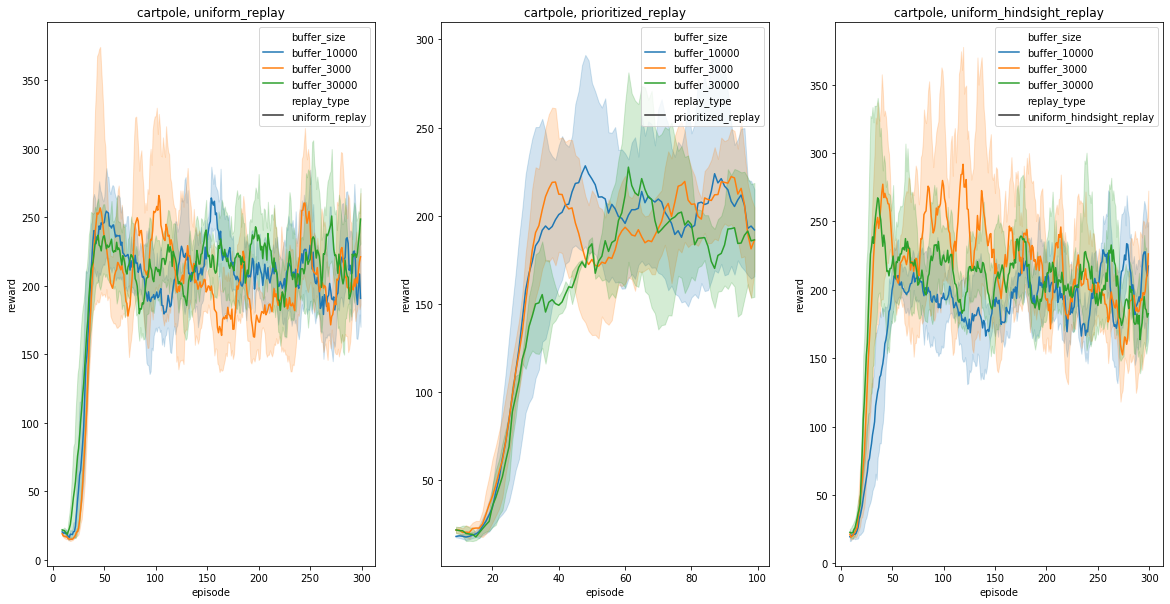

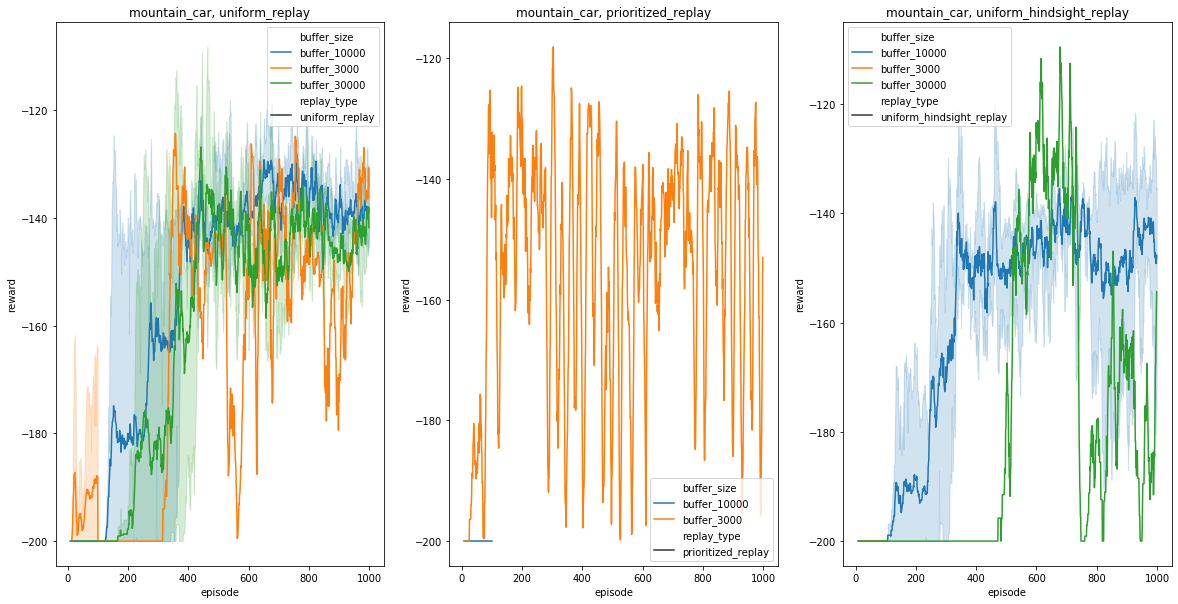

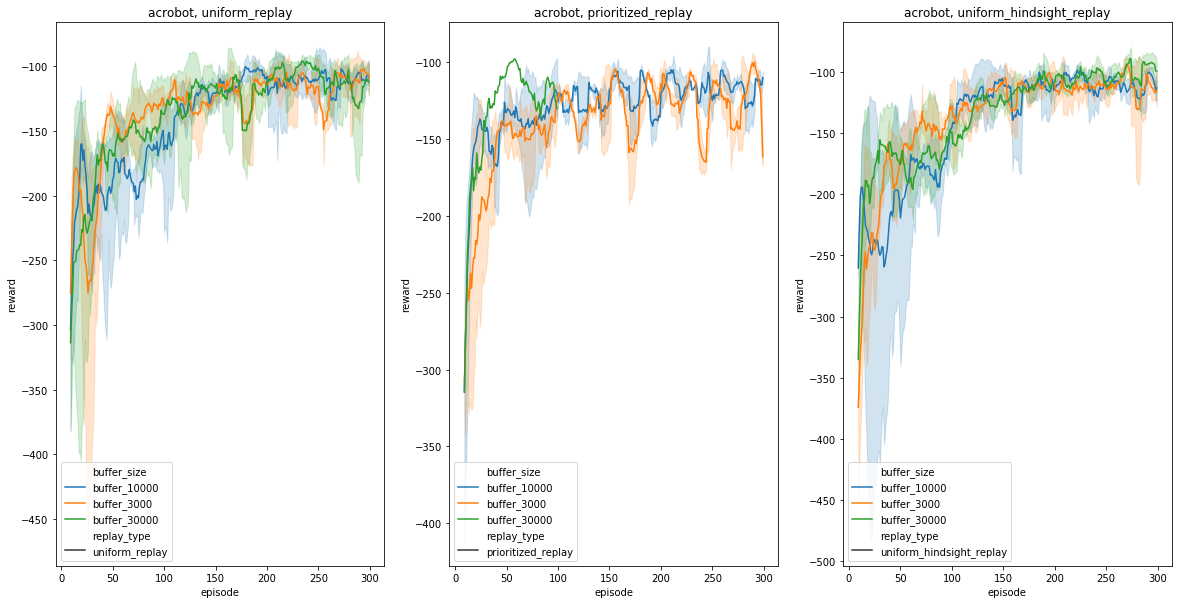

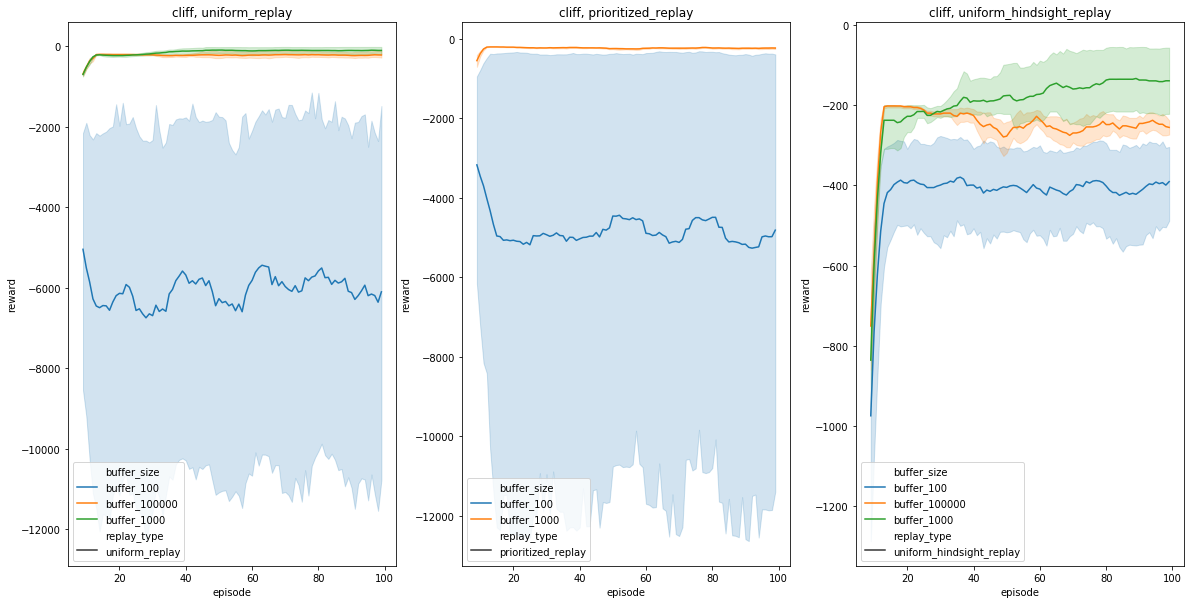

In [7]:
for env in scores['env'].unique():
    fig, ax = plt.subplots(1, 3, figsize=(20,10))
    
    for index, replay_type in enumerate(scores['replay_type'].unique()):
        
        part = scores[(scores['env'] == env) & (scores['replay_type'] == replay_type)]
        
        sns.lineplot(ax=ax[index], data=part, x='episode', y='reward', hue='buffer_size')
        ax[index].set_title(f"{env}, {replay_type}")
    
    plt.show()

KeyboardInterrupt: 

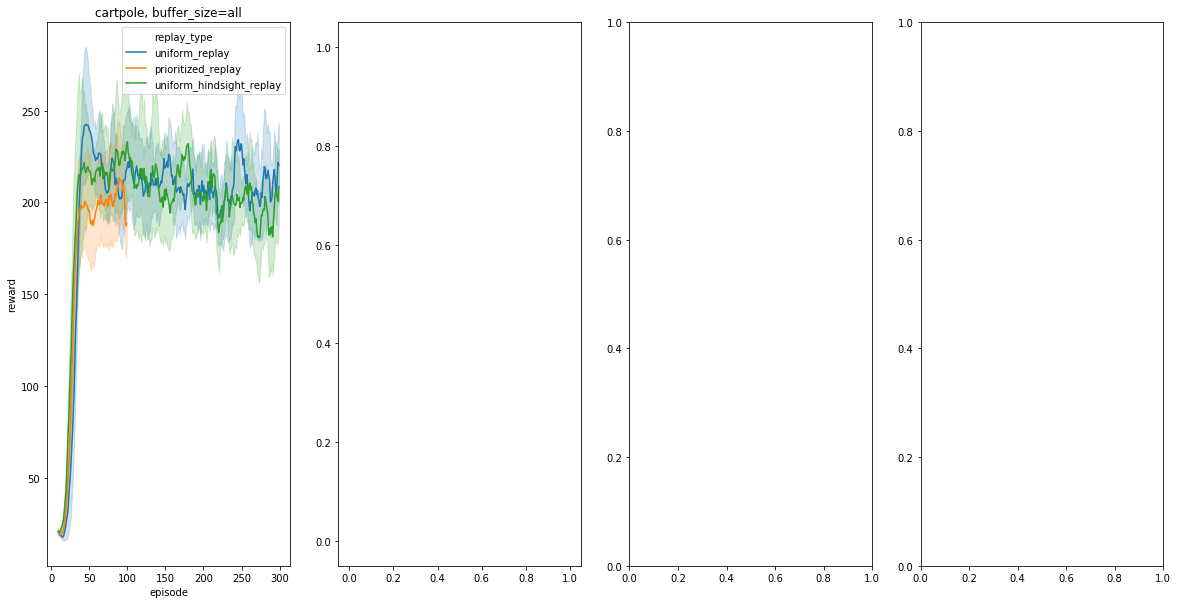

In [12]:
#
fig, ax = plt.subplots(1, 4, figsize=(20,10))

for index, env in enumerate(scores['env'].unique()):
    part = scores[(scores['env'] == env)]

    sns.lineplot(ax=ax[index], data=part, x='episode', y='reward', hue='replay_type')
    ax[index].set_title(f"{env}, buffer_size=all")
    
plt.show()



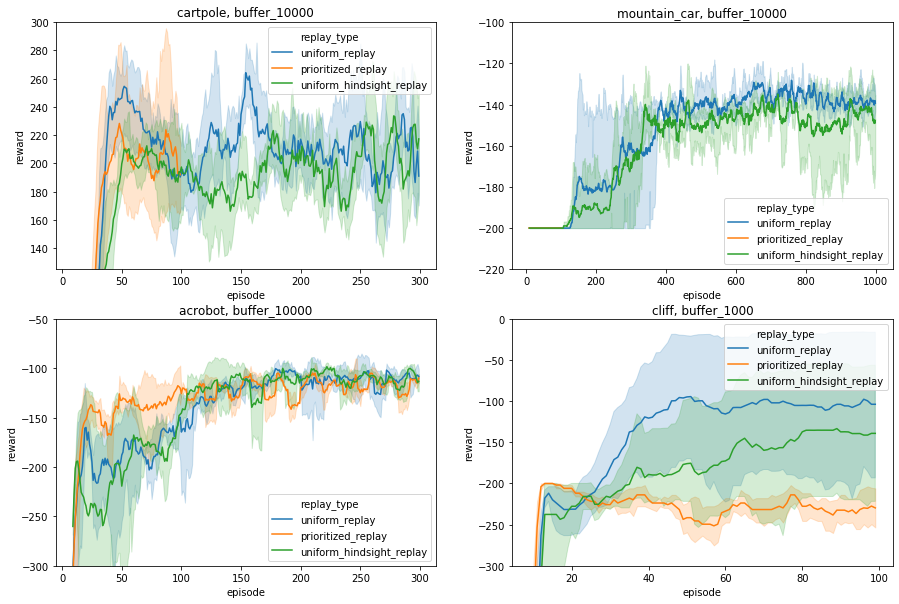

In [29]:
#
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

y_limits = {
    'cliff': (-300, 0),
    'cartpole': (125, 300),
    'mountain_car': (-220, -100),
    'acrobot': (-300, -50),
}
indices = [(0, 0), (0, 1), (1, 0), (1, 1)]
for index, env in zip(indices, scores['env'].unique()):
    
    if env == 'cliff':
        buffer = 'buffer_1000'
        part = scores[(scores['env'] == env) & (scores['buffer_size'] == buffer)]
    else:
        buffer = 'buffer_10000'
        part = scores[(scores['env'] == env) & (scores['buffer_size'] == buffer)]

    sns.lineplot(ax=ax[index], data=part, x='episode', y='reward', hue='replay_type')
    ax[index].set_title(f"{env}, {buffer}")
    ax[index].set_ylim(*y_limits[env])
    
plt.show()

/home/max/anaconda3/envs/rl2019/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/max/anaconda3/envs/rl2019/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


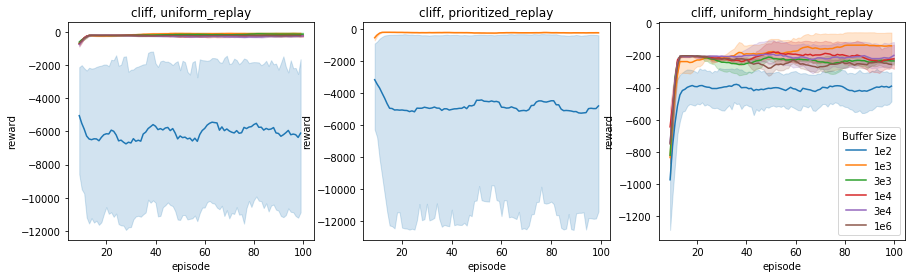

/home/max/anaconda3/envs/rl2019/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/max/anaconda3/envs/rl2019/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
labels = ['1e2', '1e3', '3e3', '1e4', '3e4', '1e6']
for env in ['cliff']:
    fig, ax = plt.subplots(1, 3, figsize=(15,4))
    
    for index, replay_type in enumerate(scores['replay_type'].unique()):
        
        part = scores[(scores['env'] == env) & (scores['replay_type'] == replay_type) & (scores['episode'] <= 100)]
        part['buffer_int'] = part['buffer_size']
        part['buffer_int'] = part['buffer_int'].map(lambda x : int(x.split('_')[1]))
        part = part.sort_values('buffer_int')
        
        sns.lineplot(ax=ax[index], data=part, x='episode', y='reward', hue='buffer_size', legend=False)
        ax[index].set_title(f"{env}, {replay_type}")
    

    plt.legend(title='Buffer Size', loc='best', labels=labels)
    plt.show()

    
for env in ['cliff']:
    fig, ax = plt.subplots(1, 3, figsize=(15,4))
    
    for index, replay_type in enumerate(scores['replay_type'].unique()):
        
        part = scores[(scores['env'] == env) & (scores['replay_type'] == replay_type) & (scores['episode'] <= 100)]
        part['buffer_int'] = part['buffer_size']
        part['buffer_int'] = part['buffer_int'].map(lambda x : int(x.split('_')[1]))
        part = part.sort_values('buffer_int')
        
        sns.lineplot(ax=ax[index], data=part, x='episode', y='reward', hue='buffer_size', legend=False)
        ax[index].set_title(f"{env}, {replay_type}")
        ax[index].set_ylim((-300, 0))
    
    plt.legend(title='Buffer Size', loc='best', labels=labels)
    plt.show()